In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/liaojingwen/Desktop/Lab 1/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Basic exploration
print(data.head())  # View the first few rows
print(data.info())  # View column info (data types, null values)
print(data['sentiment'].value_counts())  # Class distribution

# Check for missing values
print(data.isnull().sum())


       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64
sentiment    0
comment      0
dtype: int64


In [4]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [5]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Clean text: lowercase, remove punctuation and stopwords
def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

# Apply text cleaning to the 'comments' column
data['cleaned_comments'] = data['comment'].apply(clean_text)

# View the cleaned data
print(data[['comment', 'cleaned_comments']].head())


                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   

                                    cleaned_comments  
0  singer golden voice love hear time great fan a...  
1  mist beautiful voice listened kid love singing...  
2  mr reeves songs love smooth voice comforting s...  
3  30 day leave 1st tour viet nam convince mary l...  
4        listening songs reminds mum played everyday  


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for word frequency
vectorizer = CountVectorizer()

# Fit and transform the cleaned comments into word frequency matrix
word_counts = vectorizer.fit_transform(data['cleaned_comments'])

# Convert to DataFrame for better visualization
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

# View word counts for the first few records
print(word_counts_df.head())


   000  045  07  10  100  1015  10m  11  111718  112919  ...  youre  youth  \
0    0    0   0   0    0     0    0   0       0       0  ...      0      0   
1    0    0   0   0    0     0    0   0       0       0  ...      0      0   
2    0    0   0   0    0     0    0   0       0       0  ...      0      0   
3    0    0   0   0    0     0    0   0       0       0  ...      0      0   
4    0    0   0   0    0     0    0   0       0       0  ...      0      0   

   youthful  youthmemories  youtube  yrs  yuo  yup  zealand  zulusbarbados  
0         0              0        0    0    0    0        0              0  
1         0              0        0    0    0    0        0              0  
2         0              0        0    0    0    0        0              0  
3         0              0        0    0    0    0        0              0  
4         0              0        0    0    0    0        0              0  

[5 rows x 3837 columns]


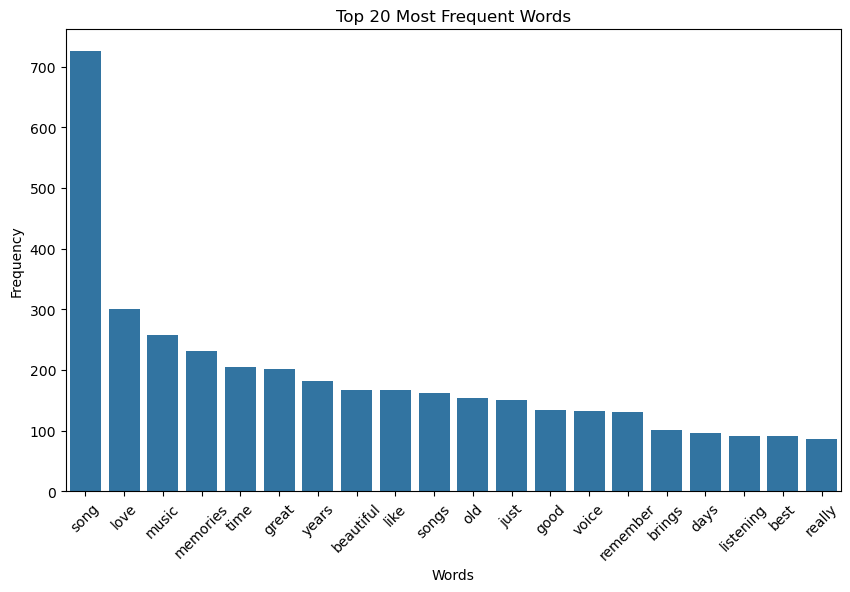

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the frequency of words in the cleaned comments
word_counts = Counter(" ".join(data['cleaned_comments']).split())

# Get the 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Plot the word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the cleaned comments
X_tfidf = tfidf.fit_transform(data['cleaned_comments'])

# Convert to DataFrame to view the TF-IDF matrix (optional)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# View the first few rows of the TF-IDF matrix
print(tfidf_df.head())


   000  045   07   10  100  1015  10m   11  111718  112919  ...  youre  youth  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0     0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0     0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0     0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0     0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0     0.0  ...    0.0    0.0   

   youthful  youthmemories  youtube  yrs  yuo  yup  zealand  zulusbarbados  
0       0.0            0.0      0.0  0.0  0.0  0.0      0.0            0.0  
1       0.0            0.0      0.0  0.0  0.0  0.0      0.0            0.0  
2       0.0            0.0      0.0  0.0  0.0  0.0      0.0            0.0  
3       0.0            0.0      0.0  0.0  0.0  0.0      0.0            0.0  
4       0.0            0.0      0.0  0.0  0.0  0.0      0.0            0.0  

[5 rows x 3837 columns]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
               precision    recall  f1-score   support

    nostalgia       0.75      0.97      0.84       152
not nostalgia       0.95      0.67      0.79       148

     accuracy                           0.82       300
    macro avg       0.85      0.82      0.82       300
 weighted avg       0.85      0.82      0.82       300

